# **Practical No: 10**

**AIM:** Airline Satisfaction

**CODE and OUTPUT:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report

from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('/content/Airline_Dataset.csv')

## Data Cleaning
#### The columns in the dataframe are cleaned and reorganized:
- Column names are renamed.
- Elements in Features 'Customer Type' and 'Class' are renamed.
- Rows with Null values are removed.
- Rows with scores of 0 in the survey of satisfaction are removed (Customers probably did not indicate).
- Departure Delay and Arrival Delay are combined.
- Satisfaction target is relabelled as 0 and 1.

In [3]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38689,29627,Male,Loyal Customer,41.0,Business travel,Business,1133.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,0.0,0.0,satisfied
38690,76133,Female,disloyal Customer,36.0,Business travel,Business,689.0,4.0,4.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,5.0,4.0,3.0,5.0,2.0,1.0,6.0,neutral or dissatisfied
38691,79281,Male,Loyal Customer,65.0,Personal Travel,Business,2248.0,1.0,4.0,1.0,2.0,5.0,5.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,5.0,19.0,7.0,neutral or dissatisfied
38692,99206,Female,Loyal Customer,23.0,Personal Travel,Eco,583.0,5.0,4.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,4.0,8.0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38694 entries, 0 to 38693
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 38694 non-null  int64  
 1   Gender                             38694 non-null  object 
 2   Customer Type                      38694 non-null  object 
 3   Age                                38693 non-null  float64
 4   Type of Travel                     38693 non-null  object 
 5   Class                              38693 non-null  object 
 6   Flight Distance                    38693 non-null  float64
 7   Inflight wifi service              38693 non-null  float64
 8   Departure/Arrival time convenient  38693 non-null  float64
 9   Ease of Online booking             38693 non-null  float64
 10  Gate location                      38693 non-null  float64
 11  Food and drink                     38693 non-null  flo

In [5]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':'Returning Customer','disloyal Customer':'First-time Customer'})

In [6]:
df = df.dropna(axis=0)

In [7]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 38692
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 38577 non-null  int64  
 1   Gender                             38577 non-null  object 
 2   Customer Type                      38577 non-null  object 
 3   Age                                38577 non-null  float64
 4   Type of Travel                     38577 non-null  object 
 5   Class                              38577 non-null  object 
 6   Flight Distance                    38577 non-null  float64
 7   Inflight wifi service              38577 non-null  float64
 8   Departure/Arrival time convenient  38577 non-null  float64
 9   Ease of Online booking             38577 non-null  float64
 10  Gate location                      38577 non-null  float64
 11  Food and drink                     38577 non-null  flo

In [9]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,64906.743059,39.288903,1186.510745,2.732872,3.060036,2.755372,2.967934,3.199964,3.250279,3.438422,3.357389,3.383234,3.346450,3.631568,3.312647,3.642896,3.286777,14.761101,15.169505
std,37382.123934,15.093674,996.662303,1.332718,1.530969,1.400643,1.286328,1.332691,1.351668,1.319854,1.331700,1.286216,1.311922,1.179970,1.261572,1.174642,1.315274,37.431548,38.021571
min,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32579.000000,27.000000,409.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64826.000000,40.000000,837.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97215.000000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,129878.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [10]:
df = df.rename(columns={'Leg room service':'Leg room'})


In [11]:
from string import capwords
df.columns = [capwords(i) for i in df.columns]
df = df.rename(columns={'Departure/arrival Time Convenient':'Departure/Arrival Time Convenience'})

In [12]:
df

,Id,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,70172,Male,Returning Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,First-time Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Returning Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Returning Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Returning Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38688,107426,Male,Returning Customer,32.0,Personal Travel,Eco,725.0,3.0,4.0,3.0,3.0,1.0,3.0,5.0,1.0,2.0,3.0,4.0,5.0,3.0,1.0,24.0,18.0,neutral or dissatisfied
38689,29627,Male,Returning Customer,41.0,Business travel,Business,1133.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,0.0,0.0,satisfied
38690,76133,Female,First-time Customer,36.0,Business travel,Business,689.0,4.0,4.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,5.0,4.0,3.0,5.0,2.0,1.0,6.0,neutral or dissatisfied
38691,79281,Male,Returning Customer,65.0,Personal Travel,Business,2248.0,1.0,4.0,1.0,2.0,5.0,5.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,5.0,19.0,7.0,neutral or dissatisfied


In [13]:
df = df[(df['Inflight Wifi Service']!=0)&(df['Departure/Arrival Time Convenience']!=0)&(df['Ease Of Online Booking']!=0)&(df['Gate Location'])&(df['Food And Drink']!=0)&(df['Online Boarding']!=0)&(df['Seat Comfort']!=0)&(df['Inflight Entertainment']!=0)&(df['On-board Service']!=0)&(df['Leg Room']!=0)&(df['Baggage Handling']!=0)&(df['Checkin Service']!=0)&(df['Inflight Service']!=0)&(df['Cleanliness']!=0)]

In [14]:
df['Satisfaction'] = df['Satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df = df.reset_index()
df = df.drop('index',axis=1)
df['Total Delay'] = df['Departure Delay In Minutes'] + df['Arrival Delay In Minutes']


In [15]:
DF = df.copy()
df = df.drop('Id',axis=1)

In [16]:
df = df.reindex(columns=['Satisfaction']+list(df.columns)[:-2]+['Total Delay'])
df = df.drop(['Departure Delay In Minutes','Arrival Delay In Minutes'],axis=1)

In [17]:
df['Satisfaction'].value_counts(normalize=True)


0    0.571288
1    0.428712
Name: Satisfaction, dtype: float64

In [18]:
df['Class'] = df['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

In [19]:
df

,Satisfaction,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay
0,0,Male,Returning Customer,13.0,Personal Travel,Economy,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,43.0
1,0,Male,First-time Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,7.0
2,1,Female,Returning Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0
3,0,Female,Returning Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,20.0
4,1,Male,Returning Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35534,0,Male,Returning Customer,32.0,Personal Travel,Economy,725.0,3.0,4.0,3.0,3.0,1.0,3.0,5.0,1.0,2.0,3.0,4.0,5.0,3.0,1.0,42.0
35535,1,Male,Returning Customer,41.0,Business travel,Business,1133.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,0.0
35536,0,Female,First-time Customer,36.0,Business travel,Business,689.0,4.0,4.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,5.0,4.0,3.0,5.0,2.0,7.0
35537,0,Male,Returning Customer,65.0,Personal Travel,Business,2248.0,1.0,4.0,1.0,2.0,5.0,5.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,5.0,26.0


## Exploratory Data Analysis and Feature Selection

#### Create visualizations to first understand business problem, and also identify important features for model building:
- Find out proportion of classes in target, and split them by Type of Travel and Type of Customers (To understand trend of satisfaction - useful later in model evaluation)
- Identify feature significance for model through visualizing KDE plots, LASSO path and heatmap.
- After evaluation and discreet selection, I have decided to drop 'Gender, 'Total Delay','Flight Distance','Age','Gate Location' and 'Departure/Arrival Time Convenience'

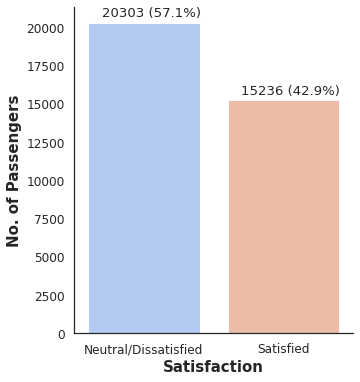

In [20]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

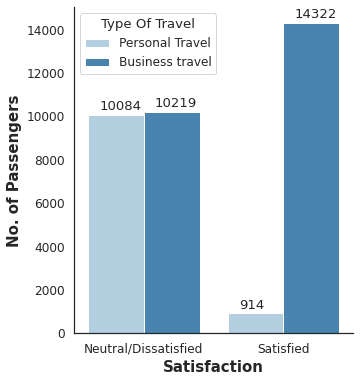

In [21]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Type Of Travel',palette='Blues')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot2.png',transparent=True, bbox_inches='tight')

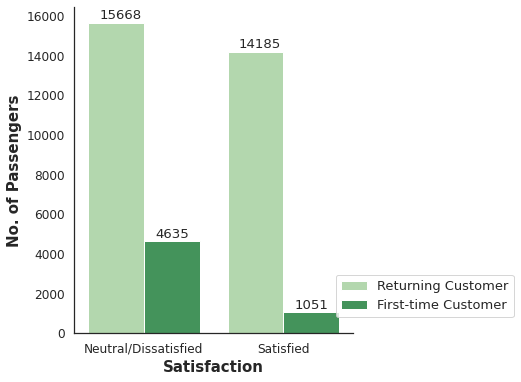

In [ ]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Customer Type',palette='Greens')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()
plt.savefig('targetplot3.png',transparent=True, bbox_inches='tight')

In [ ]:
df1 = pd.get_dummies(df,columns=['Gender','Customer Type','Type Of Travel','Class'],drop_first=True)
df1

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Gender_Male,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,43.0,1,1,1,1
1,0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,7.0,1,0,0,0
2,1,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0,1,0,0
3,0,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,20.0,0,1,0,0
4,1,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35534,0,32.0,725.0,3.0,4.0,3.0,3.0,1.0,3.0,5.0,1.0,2.0,3.0,4.0,5.0,3.0,1.0,42.0,1,1,1,1
35535,1,41.0,1133.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,0.0,1,1,0,0
35536,0,36.0,689.0,4.0,4.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,5.0,4.0,3.0,5.0,2.0,7.0,0,0,0,0
35537,0,65.0,2248.0,1.0,4.0,1.0,2.0,5.0,5.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,5.0,26.0,1,1,1,0


In [ ]:
df['Inflight Wifi Service'].value_counts()

2.0    9184
3.0    9057
4.0    6975
1.0    6214
5.0    4109
Name: Inflight Wifi Service, dtype: int64

In [ ]:
group = df1.groupby(['Satisfaction','Class_Economy'])['Class_Economy'].count()
group

Satisfaction  Class_Economy
0             0                 5402
              1                14901
1             0                11845
              1                 3391
Name: Class_Economy, dtype: int64

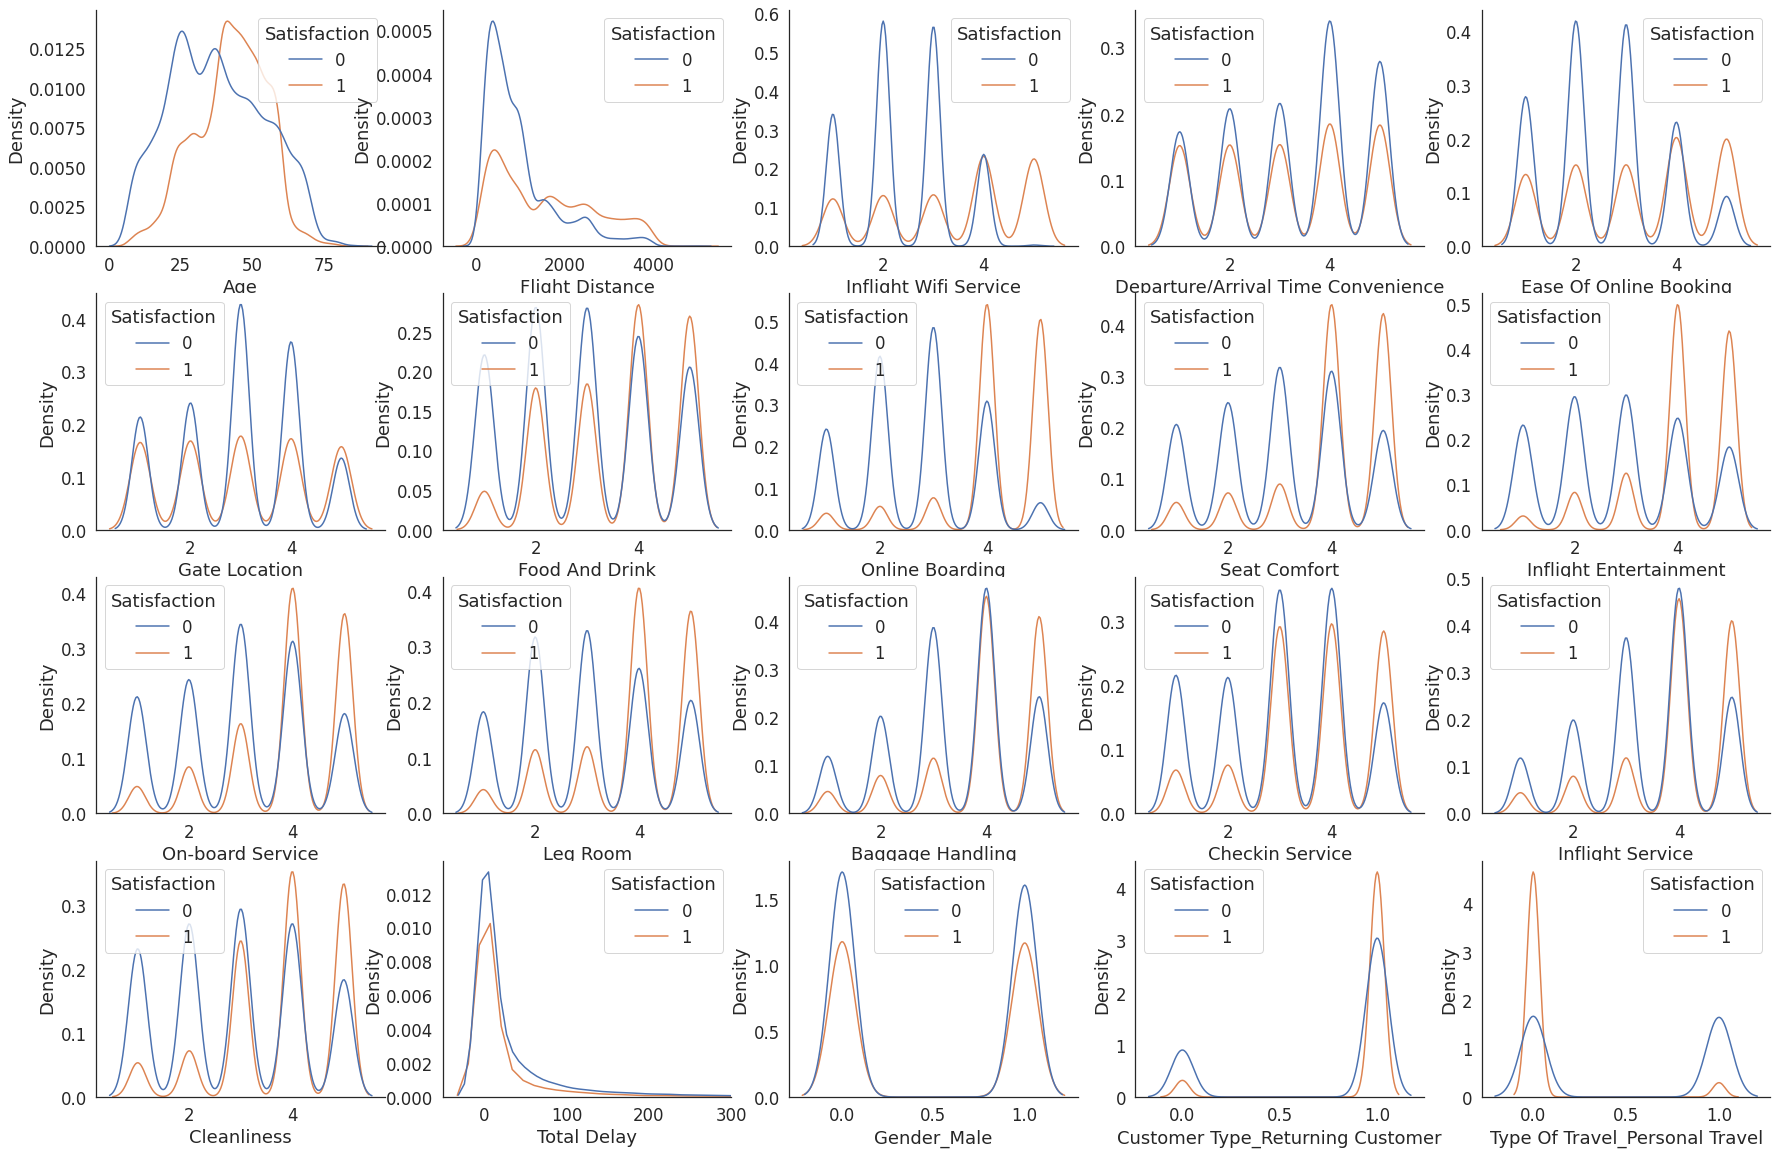

In [ ]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()
    plt.savefig('kdeplot.png',transparent=True, bbox_inches='tight')

In [ ]:
df1 = df1.drop('Gender_Male',axis=1)

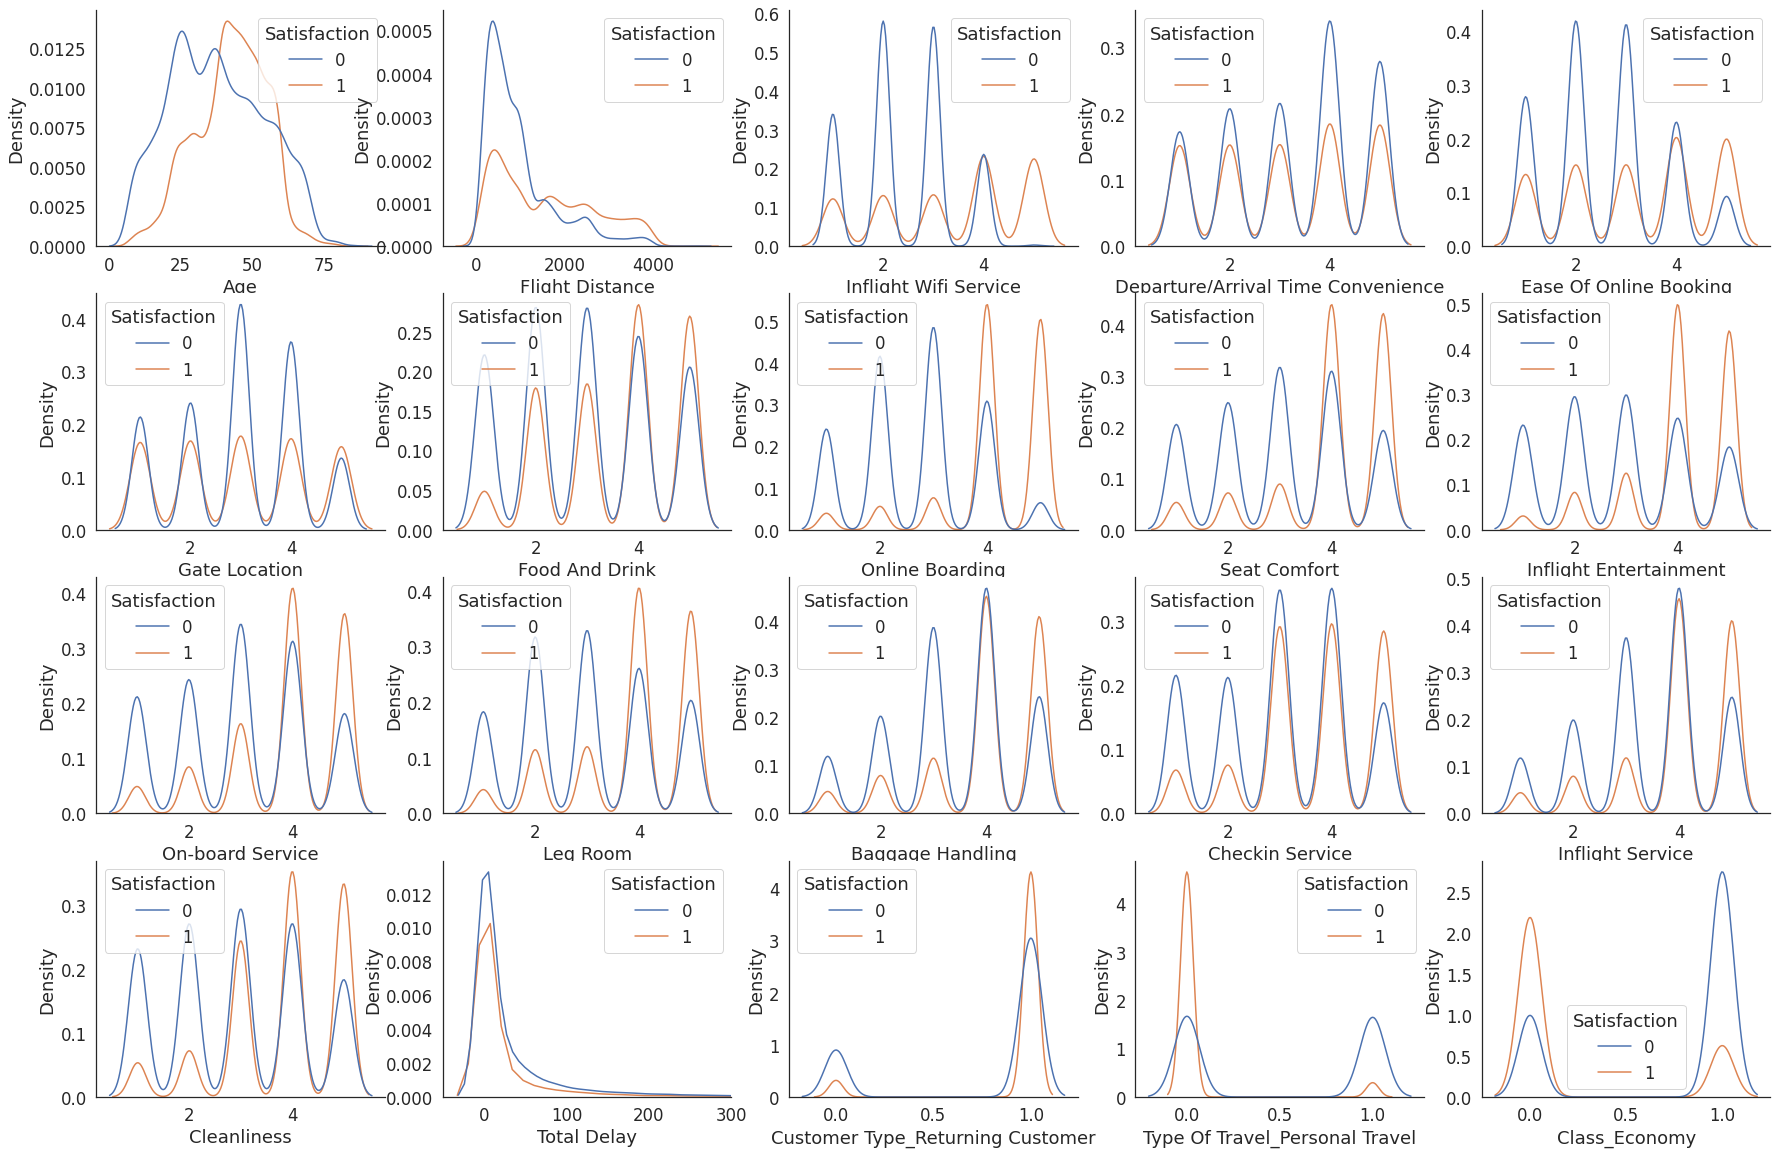

In [ ]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()

In [ ]:
corr_matrix = df1.corr()
corr_matrix

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
Satisfaction,1.000000,0.158478,0.309195,0.375595,-0.060647,0.231183,0.005683,0.231749,0.572141,0.376064,0.435051,0.340867,0.345366,0.270070,0.236798,0.263904,0.329360,-0.050109,0.215061,-0.467500,-0.506361
Age,0.158478,1.000000,0.077493,0.024121,-0.014926,0.027332,-0.009814,0.017299,0.194404,0.159613,0.074781,0.069550,0.056166,-0.037366,0.047756,-0.040984,0.049358,-0.015041,0.246029,-0.077288,-0.142650
Flight Distance,0.309195,0.077493,1.000000,0.016407,-0.069799,0.060728,0.008405,0.059496,0.197317,0.151614,0.134137,0.117439,0.136950,0.078079,0.073543,0.067207,0.096175,-0.003010,0.206061,-0.277606,-0.470455
Inflight Wifi Service,0.375595,0.024121,0.016407,1.000000,0.388454,0.670363,0.380253,0.152908,0.458491,0.148005,0.224575,0.124667,0.157484,0.115949,0.052840,0.107329,0.155099,-0.031509,0.017808,-0.132788,-0.050377
Departure/Arrival Time Convenience,-0.060647,-0.014926,-0.069799,0.388454,1.000000,0.516930,0.522605,-0.011868,0.057465,-0.013242,-0.035419,0.081013,0.002147,0.084074,0.115937,0.086862,0.004274,-0.006922,0.102043,0.266131,0.126714
Ease Of Online Booking,0.231183,0.027332,0.060728,0.670363,0.516930,1.000000,0.524979,0.027726,0.351711,0.033197,0.034192,0.033593,0.086814,0.028282,0.021597,0.029260,0.018726,-0.016796,0.032979,-0.133611,-0.118417
Gate Location,0.005683,-0.009814,0.008405,0.380253,0.522605,0.524979,1.000000,-0.003329,-0.001841,0.000473,0.005869,-0.022578,-0.001821,0.011137,-0.031856,0.014291,-0.002662,0.000193,-0.014193,-0.033950,-0.005120
Food And Drink,0.231749,0.017299,0.059496,0.152908,-0.011868,0.027726,-0.003329,1.000000,0.259688,0.571477,0.619193,0.061522,0.035840,0.039612,0.088022,0.045086,0.650110,-0.017996,0.063049,-0.068114,-0.088722
Online Boarding,0.572141,0.194404,0.197317,0.458491,0.057465,0.351711,-0.001841,0.259688,1.000000,0.451737,0.315855,0.175710,0.140892,0.106383,0.222146,0.098831,0.363350,-0.034057,0.187227,-0.229217,-0.324537
Seat Comfort,0.376064,0.159613,0.151614,0.148005,-0.013242,0.033197,0.000473,0.571477,0.451737,1.000000,0.616778,0.140032,0.120001,0.083631,0.195925,0.086326,0.678857,-0.029418,0.159399,-0.135540,-0.235355


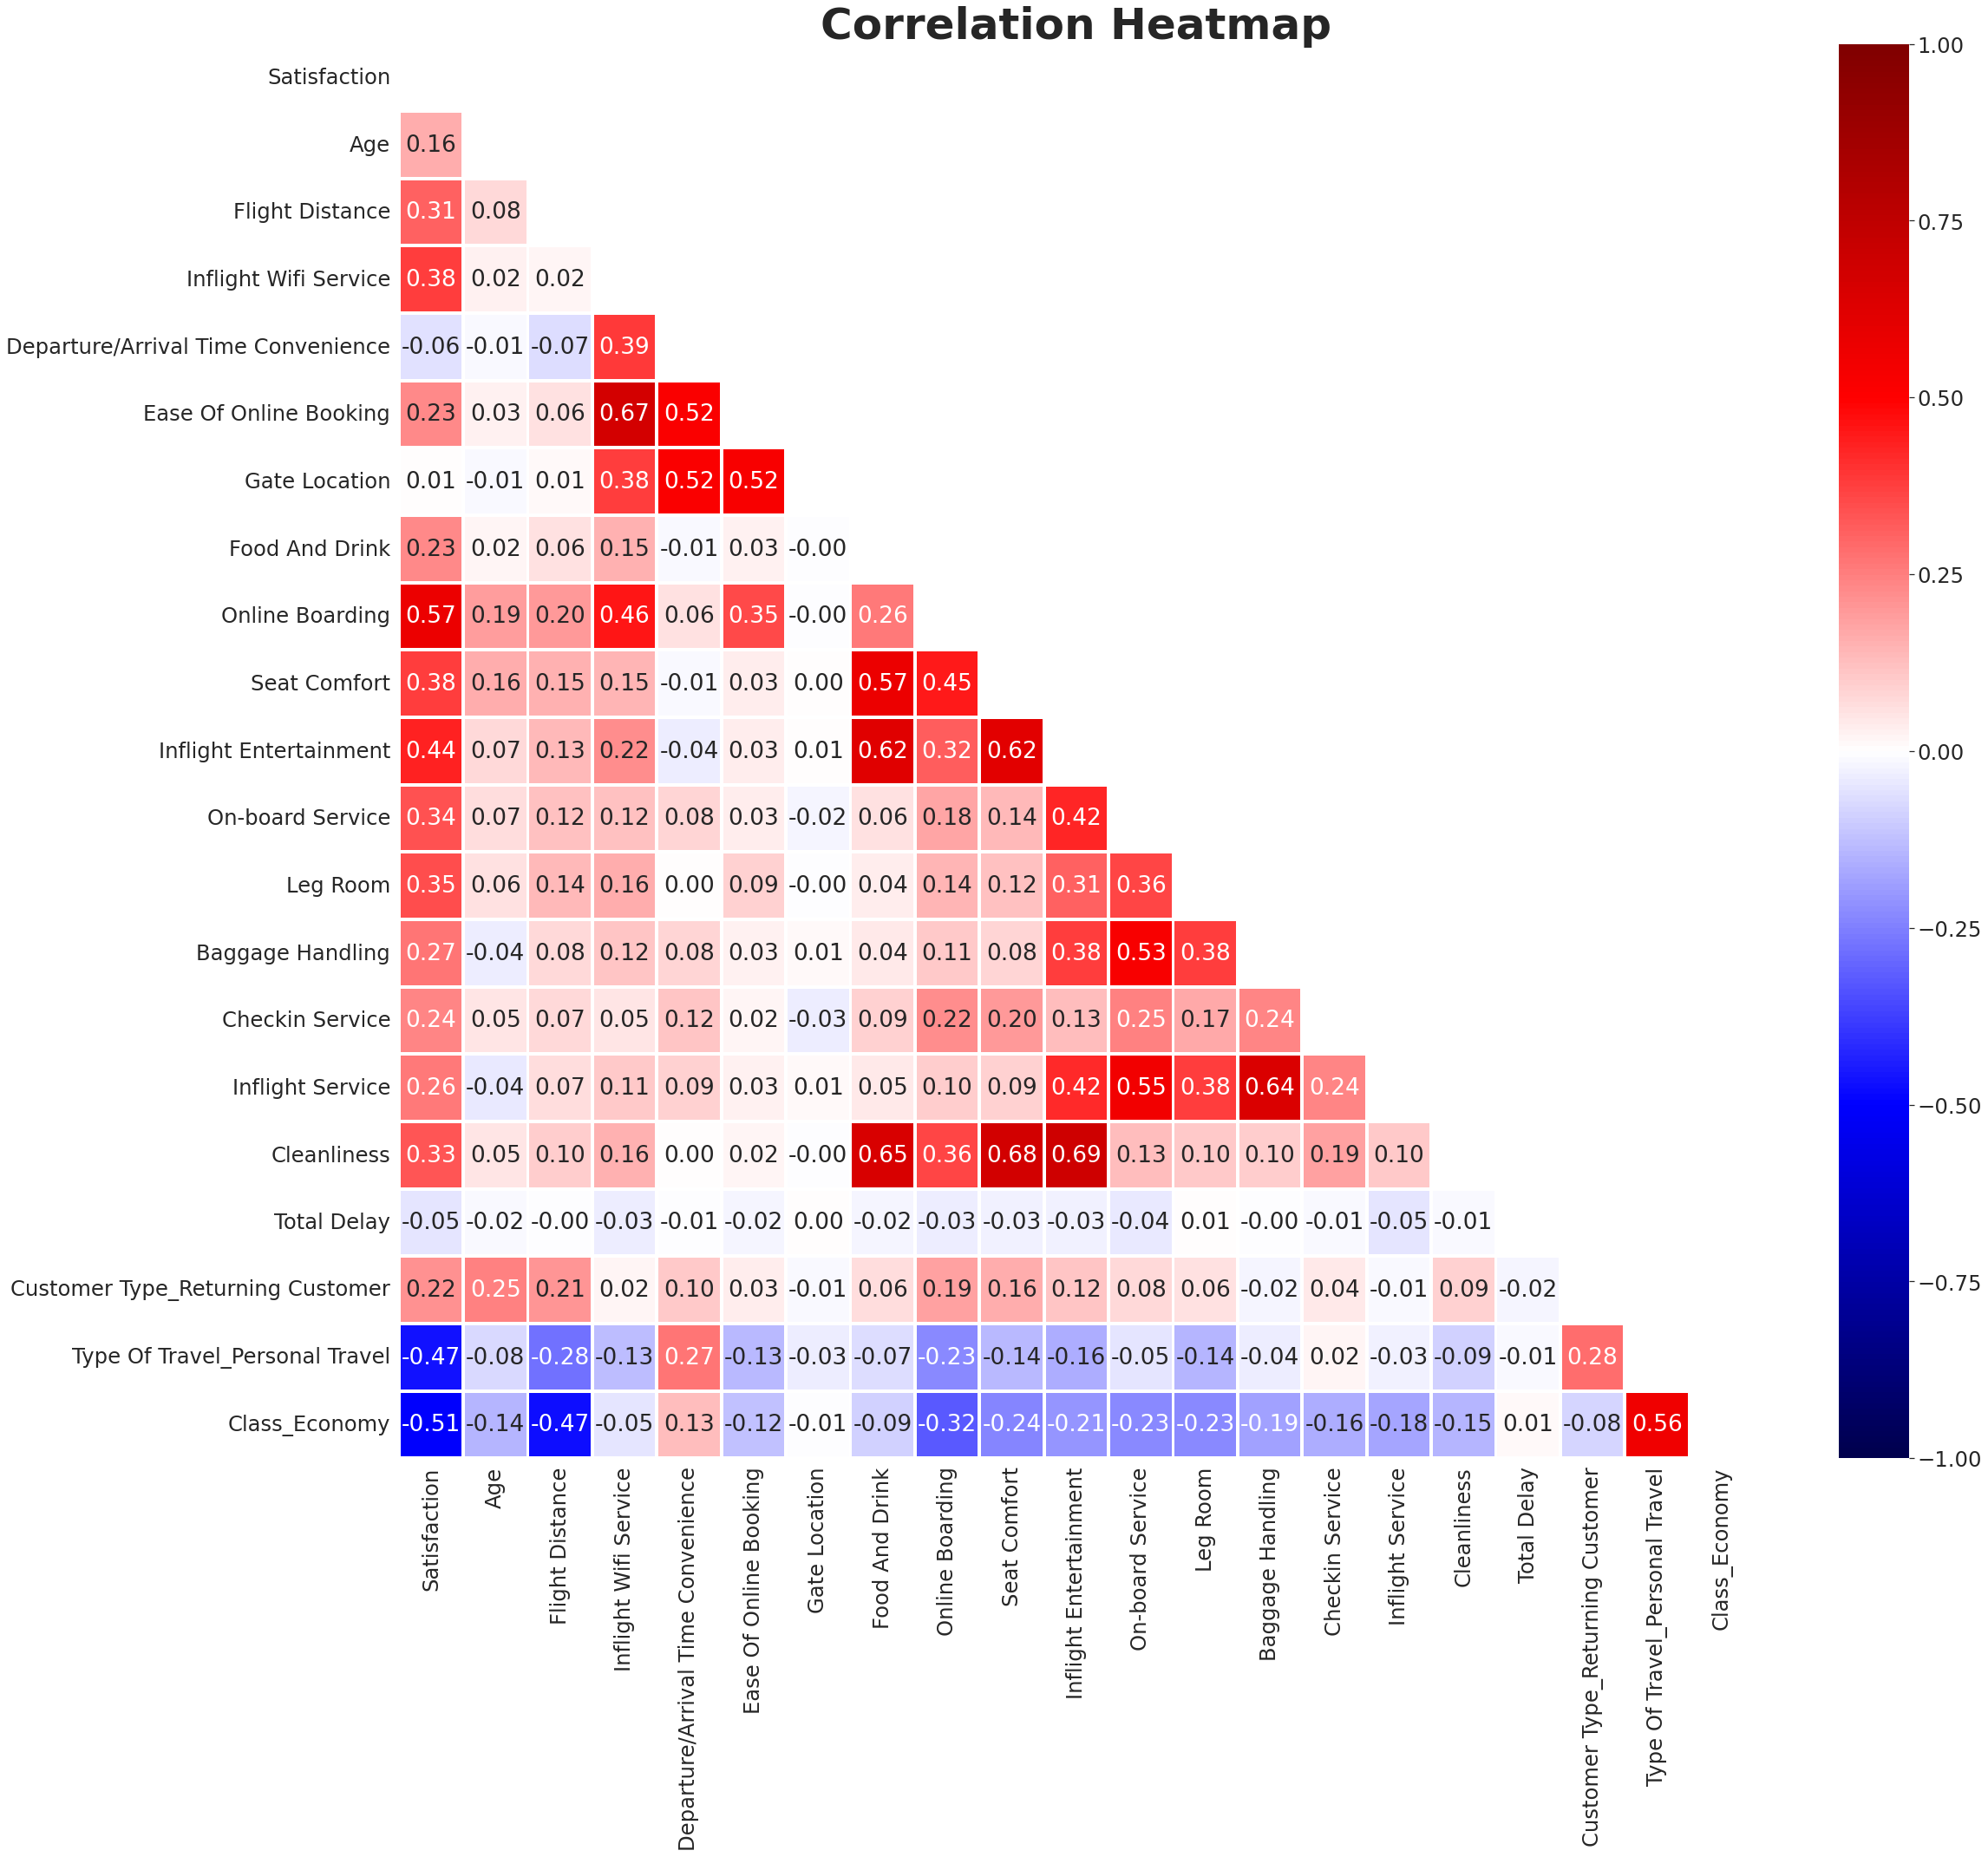

In [ ]:
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

In [ ]:
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)

In [ ]:
std = StandardScaler()
std.fit(X.values)
X_tr = std.transform(X.values)

In [ ]:
lasso_model = Lasso(alpha = 0.01)    
selected_columns = list(X.columns)
lasso_model.fit(X, y)
list(zip(selected_columns, lasso_model.coef_))

[('Age', 0.00022507436270182815),
 ('Flight Distance', 2.8534640086704267e-05),
 ('Inflight Wifi Service', 0.06402722065098584),
 ('Departure/Arrival Time Convenience', -0.02335446734641943),
 ('Ease Of Online Booking', -0.0),
 ('Gate Location', -0.003899795755203406),
 ('Food And Drink', 0.0),
 ('Online Boarding', 0.10266708652676867),
 ('Seat Comfort', 0.0034862717950247973),
 ('Inflight Entertainment', 0.0318394959246439),
 ('On-board Service', 0.03346681435694347),
 ('Leg Room', 0.0381774940749856),
 ('Baggage Handling', 0.014445501503029772),
 ('Checkin Service', 0.02791214522741307),
 ('Inflight Service', 0.007526019305859863),
 ('Cleanliness', 0.013245908549503648),
 ('Total Delay', -0.00017692724469197497),
 ('Customer Type_Returning Customer', 0.18535455859629246),
 ('Type Of Travel_Personal Travel', -0.27811189322821384),
 ('Class_Economy', -0.08910636704154588)]

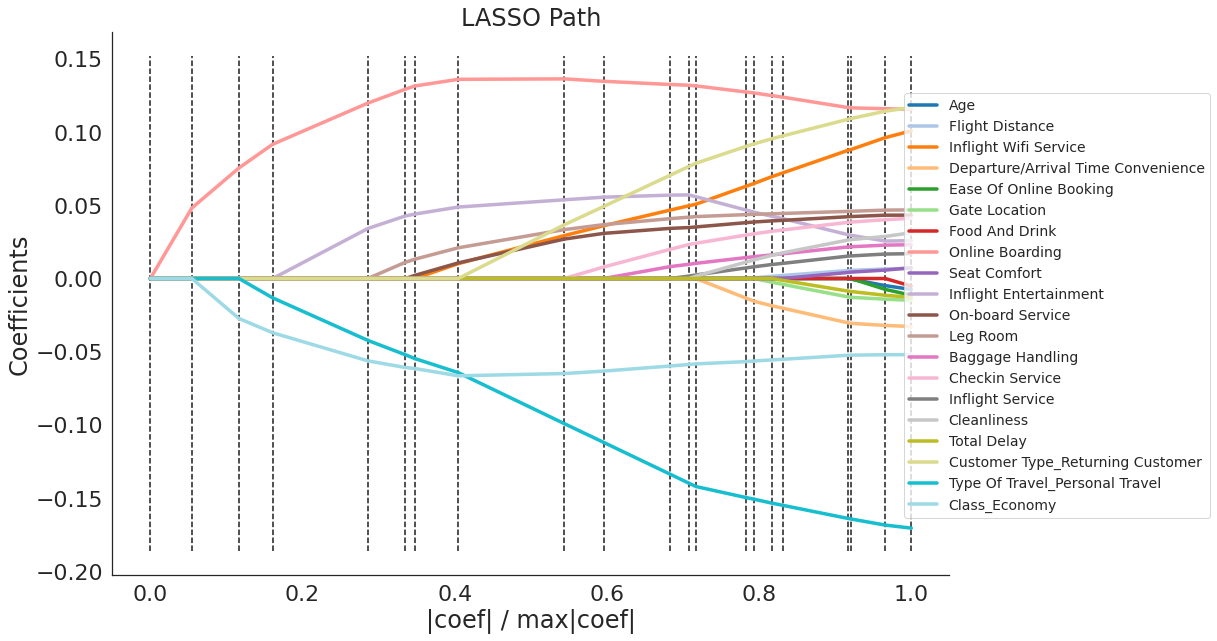

In [ ]:
alphas, _, coefs = lars_path(X_tr, y.values, method='lasso')

from cycler import cycler

# plotting the LARS path
sns.set(style='white',font_scale=2)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.rc('axes', prop_cycle =(cycler(color =['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A',
                                            '#D62728', '#FF9896', '#9467BD', '#C5B0D5', '#8C564B', '#C49C94',
                                            '#E377C2', '#F7B6D2', '#7F7F7F', '#C7C7C7', '#BCBD22', '#DBDB8D',
                                            '#17BECF', '#9EDAE5'])))

plt.figure(figsize=(15,10))
plt.plot(xx, coefs.T,linewidth=3.5)

ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X.columns,loc="upper right", bbox_to_anchor=(1.32, 0.9),fontsize=14)
sns.despine()
plt.savefig('lassoplot.png',transparent=True, bbox_inches='tight')

In [ ]:
## DROP ##
#Total Delay
#Flight Distance
#Age
#Gate Location
#df1 = df1.drop(['Total Delay','Flight Distance','Age','Gate Location'],axis=1)
#df1 = df1.drop(['Ease Of Online Booking','Food And Drink','Gate Location','Seat Comfort'],axis=1)
#df1 = df1.drop(['Total Delay','Age','Gate Location','Departure/Arrival Time Convenience'],axis=1)
df1 = df1.drop(['Total Delay','Flight Distance','Age','Gate Location','Departure/Arrival Time Convenience'],axis=1)

## Model Selection
#### Find out the best model for the data through Regularization, Cross Validation with evaluation with f1 score:
- Logistic Regression (find out the best C)
- KNN (find out the best k)
- Gaussian Naive Bayes
- Decision Trees (find out the best depth)
- Random Forest (find out the best depth; no. of trees did not improve the model significantly)
- Ensemble (Taking all the models with the best hyperparameters)

#### Random Forest is selected as the best model, but Simple Validation is conducted to tune probability threshold:
- When threshold increased from 0.5 to 0.7, a better precision is obtained from 97% to 99%
- We need the best precision for our business solution

In [ ]:
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [ ]:
Cvec = np.linspace(0.001,2,100)
logit_model = LogisticRegressionCV(Cs = Cvec, cv=kf,max_iter=10000)
logit_model.fit(X_train_val, y_train_val)
logit_model.C_

array([1.15193939])

In [ ]:
logit_model = LogisticRegression(C=logit_model.C_[0],max_iter=10000)
Mean_AUC_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_Logit_CV 

0.95834286274035

In [ ]:
Mean_Precision_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_Logit_CV 

0.8804661073866338

In [ ]:
Mean_Recall_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_Logit_CV 

0.8686353648156327

In [ ]:
X_train_val = X_train_val.reset_index().drop('index',axis=1)
y_train_val = y_train_val.reset_index().drop('index',axis=1)

In [ ]:

#score = []
#for neighbors in range(5,11):
#    f1 = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=neighbors), X_train_val, y_train_val, cv=kf, scoring='f1'))
#    score.append(f1)
#    print(neighbors)
#best_neighbors = list(range(5,11))[np.argmax(score)]  
#best_f1 = max(score)
#print('The best k neighbours is {0} with f1-score of {1}'.format(best_neighbors,best_f1))   ''''''


In [ ]:
Mean_AUC_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_KNN_CV 

0.9731068504541861

In [ ]:
Mean_Precision_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_KNN_CV 

0.940979378590361

In [ ]:
Mean_Recall_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_KNN_CV 

0.8896152457755214

In [ ]:
Mean_AUC_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_NB_CV 

0.9463452084950383

In [ ]:
Mean_Precision_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_NB_CV 

0.8917495927751297

In [ ]:
Mean_Recall_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_NB_CV 

0.8373658997883429

In [ ]:
#score = []
#for depth in range(5,20):
#    f1 = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth), X_train_val, y_train_val, cv=kf, scoring='f1'))
#    score.append(f1)
#    print(depth)
#best_depth = list(range(5,20))[np.argmax(score)]  
#best_f1 = max(score)
#print('The best depth is {0} with f1-score of {1}'.format(best_depth,best_f1)) 

In [ ]:
Mean_AUC_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_tree_CV 

0.9697936820200701

In [ ]:
Mean_Precision_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_tree_CV 

0.9566238572545969

In [ ]:
Mean_Recall_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_tree_CV 

0.9113580093679697

In [ ]:
#score = []
#for depth in range(8,13):
#    f1 = np.mean(cross_val_score(RandomForestClassifier(max_depth=depth,random_state=42), X_train_val, y_train_val, cv=kf, scoring='f1'))
#    score.append(f1)
#    print(depth)
#best_depth = list(range(8,13))[np.argmax(score)]  
#best_f1 = max(score)
#print('The best depth is {0} with f1-score of {1}'.format(best_depth,best_f1)) 

In [ ]:
#parameters = {'n_estimators':[170,200,230],'max_depth':[10,15,17],'random_state':[42]}
#rf = RandomForestClassifier()
#clf = GridSearchCV(rf,parameters,scoring='f1')
#clf

In [ ]:
#clf.fit(X_train_val, y_train_val)
#clf.best_estimator_

In [ ]:
#clf.best_score_

In [ ]:
Mean_AUC_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_forest_CV

0.9910168282349332

In [ ]:
Mean_Precision_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_forest_CV

0.9635511308011996

In [ ]:
Mean_Recall_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_forest_CV

0.9319019716192003

In [ ]:
Log_Model = LogisticRegression(C=0.04138384,max_iter=10000)
KNN_Model = KNeighborsClassifier(n_neighbors=7)
NB_Model = GaussianNB()
Tree_Model = DecisionTreeClassifier(max_depth=12)
Forest_Model = RandomForestClassifier(max_depth=17,random_state=42)

model_list = [Log_Model,KNN_Model,NB_Model,Tree_Model,Forest_Model]
model_names = ["log_model", "knn_model", "nb_model", "tree_model", "forest_model"]
model = list(zip(model_names, model_list))

In [ ]:
Mean_AUC_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_ensemble_CV

0.9858217646627789

In [ ]:
Mean_Precision_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_ensemble_CV

0.9502204392178013

In [ ]:
Mean_Recall_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_ensemble_CV

0.9093407013361918

In [ ]:
model = ['Logistic Regression','KNN','Gaussian NB','Decision Trees','Random Forest','Ensemble']
scoring = ['AUC','Precision','Recall']
model_name = ['Logit','KNN','NB','tree','forest','ensemble']
model_list = []

for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j, 'Score':eval('Mean_{0}_{1}_CV'.format(j,model_name[model.index(i)]))}
        model_list.append(model_dic)

In [ ]:
model_df = pd.DataFrame(model_list)
model_df

,Model,Scoring,Score
0,Logistic Regression,AUC,0.958343
1,Logistic Regression,Precision,0.880466
2,Logistic Regression,Recall,0.868635
3,KNN,AUC,0.973107
4,KNN,Precision,0.940979
5,KNN,Recall,0.889615
6,Gaussian NB,AUC,0.946345
7,Gaussian NB,Precision,0.891750
8,Gaussian NB,Recall,0.837366
9,Decision Trees,AUC,0.969794


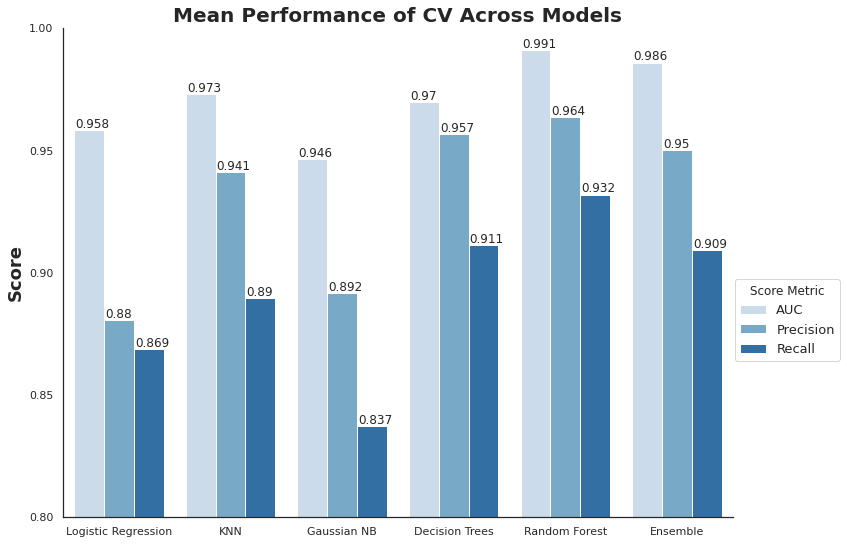

In [ ]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[12,9])
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Blues')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.01, p.get_height()+0.001))
plt.legend(title='Score Metric',loc="upper right", bbox_to_anchor=(1.17, 0.5),fontsize=13)
plt.ylim([0.8,1.0])
plt.yticks([0.80,0.85,0.90,0.95,1.00])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
plt.title('Mean Performance of CV Across Models',weight='bold',fontsize=20)
sns.despine()
plt.savefig('modelbarplot.png',transparent=True, bbox_inches='tight')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,random_state=42)

In [ ]:
rf = RandomForestClassifier(max_depth=17, random_state=42)
rf.fit(X_train,y_train)
print("Random Forest score: {:.4f}".format(rf.score(X_train,y_train)))

Random Forest score: 0.9912


In [ ]:
y_predict = rf.predict_proba(X_val)[:, 1] >= 0.5
precision_05 = precision_score(y_val, y_predict)
precision_05

0.9630758807588076

In [ ]:
recall_05=recall_score(y_val, y_predict)
recall_05

0.9333552199606041

In [ ]:
y_predict = rf.predict_proba(X_val)[:, 1] >= 0.7
precision_07 = precision_score(y_val, y_predict)
precision_07

0.9893577981651376

In [ ]:
recall_07=recall_score(y_val, y_predict)
recall_07

0.8850952068286277

In [ ]:
roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])

0.991505717517675

In [ ]:
SV_model = [{'Scoring':'Precision','Threshold':0.5,'Score':precision_05},{'Scoring':'Precision','Threshold':0.7,'Score':precision_07},{'Scoring':'Recall','Threshold':0.5,'Score':recall_05},{'Scoring':'Recall','Threshold':0.7,'Score':recall_07}]
SV_model = pd.DataFrame(SV_model)
SV_model

,Scoring,Threshold,Score
0,Precision,0.5,0.963076
1,Precision,0.7,0.989358
2,Recall,0.5,0.933355
3,Recall,0.7,0.885095


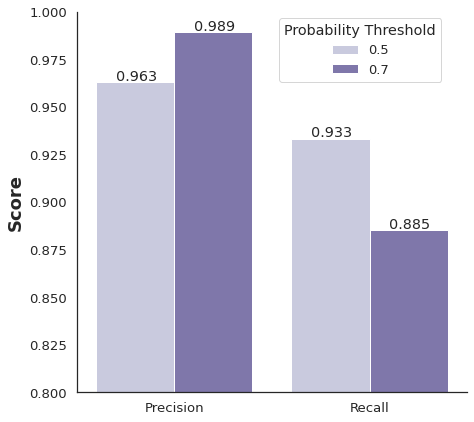

In [ ]:
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[7,7])
ax = sns.barplot(x='Scoring',y='Score',data=SV_model,hue='Threshold',palette='Purples')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.1, p.get_height()+0.001))
plt.legend(title='Probability Threshold',loc="upper right", bbox_to_anchor=(0.95, 1),fontsize=13)
plt.ylim([0.8,1.0])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
sns.despine()
plt.savefig('probabilityplot.png',transparent=True, bbox_inches='tight')

## Model Evaluation

#### Model selected is Random Forest (depth=17) with threshold>=0.7. We evaluate the model on the test set:
- Plotting the confusion matrix, ROC curve
- Find out the precision, recall and AUC

#### The model is then tested on a business problem - How to ensure first-time customer satisfaction for economy/business:
- Random Forest Feature Importance is plotted to understand which feature scores to adjust
- Good Inflight Wifi service is crucial for customer satisfaction for both economy/business class customers
- Ease of online booking is important to business class customers

In [ ]:
rf = RandomForestClassifier(max_depth=17,random_state=42)
rf.fit(X_train_val,y_train_val)
print("Random Forest score: {:.4f}".format(rf.score(X_train_val,y_train_val)))

Random Forest score: 0.9893


In [ ]:
def make_confusion_matrix(model, threshold=0.7):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    satisfaction_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=120)
    ax = sns.heatmap(satisfaction_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
           yticklabels=['Neutral/Dissatisfied', 'Satisfied']);   
    plt.xlabel('Prediction',weight='bold',fontsize=12)
    plt.ylabel('Actual',weight='bold',fontsize=12)
    plt.title('Confusion Matrix',weight='bold',fontsize=15)

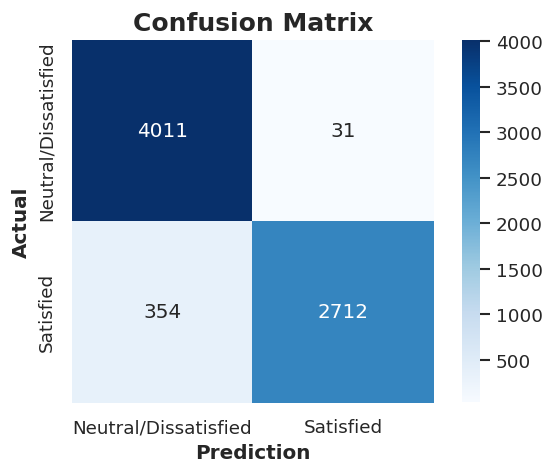

In [ ]:
sns.set(style='white',font_scale=1)
make_confusion_matrix(rf)
plt.savefig('confusionplot.png',transparent=True, bbox_inches='tight')

In [ ]:
interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [ ]:
y_predict = rf.predict_proba(X_test)[:, 1]>=0.7
precision_score(y_test, y_predict)

0.988698505286183

In [ ]:
recall_score(y_test, y_predict)

0.8845401174168297

In [ ]:
f1_score(y_test, y_predict)

0.933723532449647

In [ ]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.9901688258284749

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

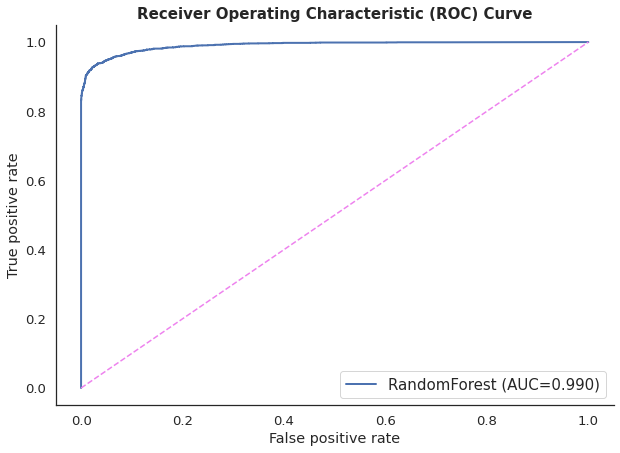

In [ ]:
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
plt.plot(fpr, tpr,lw=2,label='RandomForest (AUC={:.3f})'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc="lower right",fontsize=15)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',weight='bold',fontsize=15);
sns.despine()
plt.savefig('ROCplot.png',transparent=True, bbox_inches='tight')

In [ ]:
rf.feature_importances_

array([0.12561999, 0.03716158, 0.01703999, 0.20298856, 0.06221411,
       0.07005111, 0.03964898, 0.05237438, 0.03418997, 0.03066408,
       0.02993623, 0.03348376, 0.04363408, 0.1093878 , 0.11160539])

In [ ]:
df_impt = pd.DataFrame({'features':X_train_val.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=True)
df_impt

,features,importance
2,Food And Drink,0.017040
10,Inflight Service,0.029936
9,Checkin Service,0.030664
11,Cleanliness,0.033484
8,Baggage Handling,0.034190
1,Ease Of Online Booking,0.037162
6,On-board Service,0.039649
12,Customer Type_Returning Customer,0.043634
7,Leg Room,0.052374
4,Seat Comfort,0.062214


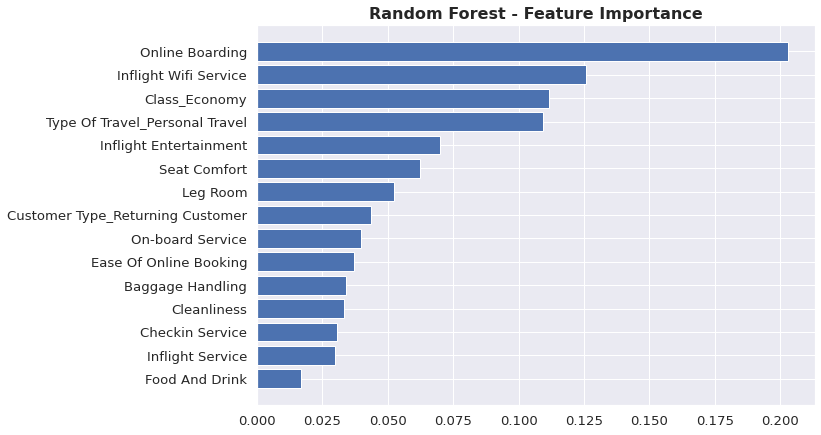

In [ ]:
sns.set(style='darkgrid',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
ax = plt.barh(df_impt['features'],df_impt['importance'])
plt.title('Random Forest - Feature Importance',weight='bold',fontsize=16)
plt.savefig('featureplot.png',transparent=True, bbox_inches='tight')

In [ ]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(DF['Id']))
Test_Set['Predicted Satisfaction'] = (rf.predict_proba(X_test)[:, 1]>=0.7).astype(int)
Test_Set = Test_Set[['Satisfaction','Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set['Satisfaction'] = Test_Set['Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
Test_Set['Predicted Satisfaction'] = Test_Set['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
Test_Set

,Satisfaction,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Satisfied,Satisfied,2.0,2.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,1.0,1,0,0
1,Satisfied,Satisfied,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,1,0,0
2,Neutral/Dissatisfied,Neutral/Dissatisfied,4.0,3.0,5.0,3.0,5.0,5.0,3.0,4.0,5.0,4.0,5.0,5.0,1,1,1
3,Neutral/Dissatisfied,Neutral/Dissatisfied,3.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,1.0,1,1,1
4,Satisfied,Satisfied,4.0,4.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,Satisfied,Satisfied,1.0,1.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1,0,0
7104,Neutral/Dissatisfied,Neutral/Dissatisfied,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,3.0,3.0,2.0,1,0,1
7105,Satisfied,Satisfied,1.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,1,0,0
7106,Satisfied,Satisfied,1.0,1.0,2.0,5.0,5.0,3.0,3.0,4.0,3.0,5.0,3.0,4.0,1,0,0


In [ ]:
Test_Set[(Test_Set['Class_Economy']==0)&(Test_Set['Satisfaction']=='Satisfied')&(Test_Set['Type Of Travel_Personal Travel']==0)&((Test_Set['Inflight Wifi Service']!=5))].head(100)

,Satisfaction,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Satisfied,Satisfied,2.0,2.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,1.0,1,0,0
1,Satisfied,Satisfied,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,1,0,0
4,Satisfied,Satisfied,4.0,4.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1,0,0
11,Satisfied,Satisfied,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,1,0,0
15,Satisfied,Satisfied,1.0,1.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,1,0,0
16,Satisfied,Satisfied,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0,1.0,1.0,5.0,1,0,0
17,Satisfied,Satisfied,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,0,0
18,Satisfied,Satisfied,1.0,1.0,3.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1,0,0
23,Satisfied,Satisfied,3.0,3.0,1.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1,0,0
26,Satisfied,Satisfied,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,1,0,0


In [ ]:
Test_Set_Economy = Test_Set[(Test_Set['Class_Economy']==1)&(Test_Set['Type Of Travel_Personal Travel']==1)&(Test_Set['Customer Type_Returning Customer']==0)]
Test_Set_Economy['Satisfaction'] = Test_Set_Economy['Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
Test_Set_Economy['Predicted Satisfaction'] = Test_Set_Economy['Predicted Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
precision_score(Test_Set_Economy['Satisfaction'], Test_Set_Economy['Predicted Satisfaction'])

0.0

In [ ]:
## NEW ECONOMY (Personal Travel) CUSTOMERS ##
neweconomy = []
neweconomy.append({'Inflight Wifi Service':3,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1})     
neweconomy.append({'Inflight Wifi Service':5,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1})
neweconomy.append({'Inflight Wifi Service':4,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1})
neweconomy.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1}) 
neweconomy = pd.DataFrame(neweconomy)

In [ ]:
neweconomy['Predicted Satisfaction'] = (rf.predict_proba(neweconomy)[:, 1]>=0.7).astype(int)
neweconomy = neweconomy[['Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
neweconomy['Predicted Satisfaction'] = neweconomy['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
neweconomy

,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,3,3,3,3,3,3,3,3,3,3,3,3,0,1,1
1,Satisfied,5,3,3,3,3,3,3,3,3,3,3,3,0,1,1
2,Satisfied,4,5,5,5,5,5,5,5,5,5,5,5,0,1,1
3,Neutral/Dissatisfied,3,5,5,5,5,5,5,5,5,5,5,5,0,1,1


In [ ]:
Test_Set_Business = Test_Set[(Test_Set['Class_Economy']==0)&(Test_Set['Type Of Travel_Personal Travel']==0)&(Test_Set['Customer Type_Returning Customer']==0)]
Test_Set_Business['Satisfaction'] = Test_Set_Business['Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
Test_Set_Business['Predicted Satisfaction'] = Test_Set_Business['Predicted Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
precision_score(Test_Set_Business['Satisfaction'], Test_Set_Business['Predicted Satisfaction'])

0.9381443298969072

In [ ]:
## NEW Business (Business Travel) CUSTOMERS ##
newbusiness = []
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})     
newbusiness.append({'Inflight Wifi Service':5,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness = pd.DataFrame(newbusiness)

In [ ]:
newbusiness['Predicted Satisfaction'] = (rf.predict_proba(newbusiness)[:, 1]>=0.5).astype(int)
newbusiness = newbusiness[['Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
newbusiness['Predicted Satisfaction'] = newbusiness['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
newbusiness

,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0
1,Satisfied,5,3,3,3,3,3,3,3,3,3,3,3,0,0,0
2,Neutral/Dissatisfied,3,5,5,5,5,5,5,5,5,5,5,5,0,0,0
3,Neutral/Dissatisfied,3,4,4,4,4,4,4,4,4,4,4,4,0,0,0
4,Neutral/Dissatisfied,3,5,4,4,4,4,4,4,4,4,4,4,0,0,0
5,Neutral/Dissatisfied,3,4,5,5,5,5,5,5,5,5,5,5,0,0,0
